In [10]:
import torch
import os
import matplotlib.pyplot as plt
import sys
from torchvision import transforms
from PIL import Image
from scripts.resnet_model import get_resnet18
import torch.nn.functional as F

In [21]:
img_size = 224
model_path = "models/car_resnet18_model_best.pth"
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
test_dir = "data_split/test"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [23]:
class_names = sorted(os.listdir(test_dir))
print(class_names)

['bumper_dent', 'bumper_scratch', 'door_dent', 'door_scratch', 'glass_shatter', 'head_lamp', 'tail_lamp']


In [26]:
def load_model(model_path, num_classes):
    model = get_resnet18(num_classes=num_classes)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

model = load_model(model_path, len(class_names))

c:\Users\TUAN NGOC\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\TUAN NGOC\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Result:

Class: tail_lamp
Confidence: 0.9114176630973816


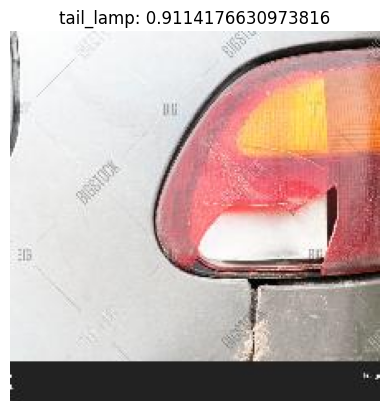

In [35]:
def predict_image(image_path, model, class_names):
    if not os.path.exists(image_path):
        print(f"Image not exist: {image_path}")
        return
    
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        prob = F.softmax(output, dim=1)[0]
        pred_index = torch.argmax(prob).item()
        pred_class = class_names[pred_index]
        confidence = prob[pred_index].item()

    print("Result:\n")
    print(f"Class: {pred_class}")
    print(f"Confidence: {confidence}")

    plt.imshow(image)
    plt.axis("off")
    plt.title(f"{pred_class}: {confidence}")
    plt.show()

image_path = "data_split/test/tail_lamp/247.jpeg"
predict_image(image_path, model, class_names)
    